In [1]:
# id – unique observation identifier
# age – age group of the person with the following levels: 18-24, 25-34, 35-44, 45-54, 55-64, 65+
# gender – gender of the person with the following levels: female, male
# education – education level of the person with the following levels: Left school before 16 years, Left school at 16 years, Left school at 17 years, Left school at 18 years, Some college or university, no certificate or degree, Professional certificate/ diploma, University degree, Masters degree, Doctorate degree
# country – country of current residence of the person with the following levels: Australia, Canada, New Zealand, Ireland, UK, USA, Other
# ethnicity – ethnicity of the person with the following levels: Asian, Black, Mixed-Black/Asian, Mixed-White/Asian, Mixed-White/Black, White, Other
# personality_neuroticism – assessment of neuroticism of the person based on psychological tests (0-100)
# personality_extraversion – assessment of extraversion of the person based on psychological tests (0-100)
# personality_openness – assessment of openness to experience of the person based on psychological tests (0-100)
# personality_agreeableness – assessment of agreeableness of the person based on psychological tests (0-100)
# personality_conscientiousness – assessment of conscientiousness of the person based on psychological tests (0-100)
# personality_impulsiveness – assessment of impulsiveness of the person based on psychological tests (0-100)
# personality_sensation – assessment of sensation of the person based on psychological tests (0-100)
# consumption_alcohol – declared consumption of alcohol with the following levels: never used, used over a decade ago, used in last decade, used in last year, used in last month, used in last week, used in last day
# consumption_amphetamines – declared consumption of amphetamines with the following levels: never used, used over a decade ago, used in last decade, used in last year, used in last month, used in last week, used in last day
# consumption_caffeine – declared consumption of caffeine with the following levels: never used, used over a decade ago, used in last decade, used in last year, used in last month, used in last week, used in last day
# consumption_cannabis – declared consumption of cannabis with the following levels: never used, used over a decade ago, used in last decade, used in last year, used in last month, used in last week, used in last day
# consumption_chocolate – declared consumption of chocolate with the following levels: never used, used over a decade ago, used in last decade, used in last year, used in last month, used in last week, used in last day
# consumption_mushrooms – declared consumption of magic mushrooms with the following levels: never used, used over a decade ago, used in last decade, used in last year, used in last month, used in last week, used in last day
# consumption_nicotine – declared consumption of nicotine with the following levels: never used, used over a decade ago, used in last decade, used in last year, used in last month, used in last week, used in last day
# consumption_cocaine_last_month – declared consumption of cocaine in the last month with the following levels: No, Yes (outcome variable, only in the training sample)

In [2]:
# Let's import the necessary libraries
import json
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, balanced_accuracy_score
from sklearn import tree
import imblearn
from os import system
from IPython.display import Image 
import graphviz
import pydot
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


/Users/arda.kaya/.pyenv/versions/3.9.4/lib/python3.9/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/arda.kaya/.pyenv/versions/3.9.4/lib/python3.9/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/arda.kaya/.pyenv/versions/3.9.4/lib/python3.9/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/arda.kaya/.pyenv/versions/3

In [3]:
# We need "consumption_cocaine_last_month" column in test module to compare our predictions based on training results, however we do not have it in the test module. 
# In this case, we can use drugs_test.csv file as "validation set" to compare our predictions based on training results since we do not need a result column for validations.
# However we need to split our drugs_train.csv file into training and test sets later.

# The purpose of the test set is to test the training. If you don't have those data labeled in the same form as the training data, then it's not a test set - Source: Stack Overflow

validation = pd.read_csv('drugs_test.csv')
data = pd.read_csv('drugs_train.csv')




In [4]:
data.shape

(1500, 21)

In [5]:
data.head()

,id,age,gender,education,country,ethnicity,personality_neuroticism,personality_extraversion,personality_openness,personality_agreeableness,...,personality_impulsiveness,personality_sensation,consumption_alcohol,consumption_amphetamines,consumption_caffeine,consumption_cannabis,consumption_chocolate,consumption_mushrooms,consumption_nicotine,consumption_cocaine_last_month
0,train_0001,45-54,male,Masters degree,USA,Mixed-Black/Asian,57.6,57.3,50.1,47.8,...,42.8,22.4,used in last week,used over a decade ago,used in last day,used in last week,used in last day,never used,used in last week,No
1,train_0002,25-34,male,University degree,USA,Mixed-Black/Asian,47.8,67.0,45.7,47.8,...,33.8,30.8,used in last week,never used,used in last week,never used,used in last day,never used,never used,No
2,train_0003,18-24,female,University degree,USA,Mixed-Black/Asian,57.6,43.3,55.3,45.6,...,63.0,62.0,used in last month,never used,used in last day,used in last week,used in last week,used in last year,used in last month,No
3,train_0004,25-34,female,Masters degree,USA,Mixed-Black/Asian,71.8,31.2,43.6,56.3,...,63.0,71.1,used in last day,never used,used in last day,used in last decade,used in last day,never used,used in last decade,No
4,train_0005,18-24,male,"Some college or university, no certificate or ...",Australia,Mixed-Black/Asian,56.1,62.3,70.2,66.1,...,50.4,62.0,used in last week,never used,used in last month,used in last month,used in last day,used in last year,used in last month,No


In [6]:
data.info()
# Our data has 1500 rows and 20 columns. Data types are object, int64 and float64. There are no missing values.
# We need to convert object data types to categorical data types and convert categorical data types to numerical data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1500 non-null   object 
 1   age                             1500 non-null   object 
 2   gender                          1500 non-null   object 
 3   education                       1500 non-null   object 
 4   country                         1500 non-null   object 
 5   ethnicity                       1500 non-null   object 
 6   personality_neuroticism         1500 non-null   float64
 7   personality_extraversion        1500 non-null   float64
 8   personality_openness            1500 non-null   float64
 9   personality_agreeableness       1500 non-null   float64
 10  personality_conscientiousness   1500 non-null   float64
 11  personality_impulsiveness       1500 non-null   float64
 12  personality_sensation           15

In [7]:
# Drop the "id" column since it is not needed for our analysis
data.drop(['id'], axis=1, inplace=True)
validation.drop(['id'], axis=1, inplace=True)

In [8]:
# Some of our columns needs normaliaztion, so we will do that here
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_columns] = data[numeric_columns].apply(lambda x: (x - x.mean()) / (x.max() - x.min()))

numeric_columns_validation = validation.select_dtypes(include=['int64', 'float64']).columns
validation[numeric_columns_validation] = validation[numeric_columns_validation].apply(lambda x: (x - x.mean()) / (x.max() - x.min()))


data.head()


,age,gender,education,country,ethnicity,personality_neuroticism,personality_extraversion,personality_openness,personality_agreeableness,personality_conscientiousness,personality_impulsiveness,personality_sensation,consumption_alcohol,consumption_amphetamines,consumption_caffeine,consumption_cannabis,consumption_chocolate,consumption_mushrooms,consumption_nicotine,consumption_cocaine_last_month
0,45-54,male,Masters degree,USA,Mixed-Black/Asian,0.060927,0.072463,-0.030087,-0.02166,0.037012,-0.041722,-0.299163,used in last week,used over a decade ago,used in last day,used in last week,used in last day,never used,used in last week,No
1,25-34,male,University degree,USA,Mixed-Black/Asian,-0.037073,0.169463,-0.074087,-0.02166,0.060012,-0.131722,-0.215163,used in last week,never used,used in last week,never used,used in last day,never used,never used,No
2,18-24,female,University degree,USA,Mixed-Black/Asian,0.060927,-0.067537,0.021913,-0.04366,-0.000988,0.160278,0.096837,used in last month,never used,used in last day,used in last week,used in last week,used in last year,used in last month,No
3,25-34,female,Masters degree,USA,Mixed-Black/Asian,0.202927,-0.188537,-0.095087,0.06334,-0.181988,0.160278,0.187837,used in last day,never used,used in last day,used in last decade,used in last day,never used,used in last decade,No
4,18-24,male,"Some college or university, no certificate or ...",Australia,Mixed-Black/Asian,0.045927,0.122463,0.170913,0.16134,-0.075988,0.034278,0.096837,used in last week,never used,used in last month,used in last month,used in last day,used in last year,used in last month,No


In [9]:
# Our categorical columns need to be encoded, so we will do that here
# To not lose any information, we will save the original categorical columns in a json file for reference
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].apply(lambda x: x.astype('category'))

categorical_columns_validation = validation.select_dtypes(include=['object']).columns
validation[categorical_columns_validation] = data[categorical_columns_validation].apply(lambda x: x.astype('category'))

def map_func(column):
	return dict(enumerate(column.cat.categories))

gender_map = map_func(data.gender)
education_map = map_func(data.education)
country_map = map_func(data.country)
ethnicity_map = map_func(data.ethnicity)
consumption_alcohol_map = map_func(data.consumption_alcohol)
consumption_amphetamines_map = map_func(data.consumption_amphetamines)
consumption_caffeine_map = map_func(data.consumption_caffeine)
consumption_cannabis_map = map_func(data.consumption_cannabis)
consumption_chocolate_map = map_func(data.consumption_chocolate)
consumption_mushrooms_map = map_func(data.consumption_mushrooms)
consumption_nicotine_map = map_func(data.consumption_nicotine)
consumption_cocaine_last_month_map = map_func(data.consumption_cocaine_last_month)

data_dict = dict({'gender_map': gender_map,
		'education_map': education_map,
		'country_map': country_map,
		'ethnicity_map': ethnicity_map,
		'consumption_alcohol_map': consumption_alcohol_map,
		'consumption_amphetamines_map': consumption_amphetamines_map,
		'consumption_caffeine_map': consumption_caffeine_map,
		'consumption_cannabis_map': consumption_cannabis_map,
		'consumption_chocolate_map': consumption_chocolate_map,
		'consumption_mushrooms_map': consumption_mushrooms_map,
		'consumption_nicotine_map': consumption_nicotine_map,
		'consumption_cocaine_last_month_map': consumption_cocaine_last_month_map})

json_data = json.dumps(data_dict, indent=4)
with open('data_dict.json', 'w+') as f:
	f.write(json_data)

data[categorical_columns] = data[categorical_columns].apply(lambda x: x.cat.codes)
validation[categorical_columns_validation] = validation[categorical_columns_validation].apply(lambda x: x.cat.codes)


In [10]:
# As you see, we have encoded our categorical columns and normalized our numeric columns.
# Now we can split our data into training and test sets and then we can start our analysis.
data.head()

,age,gender,education,country,ethnicity,personality_neuroticism,personality_extraversion,personality_openness,personality_agreeableness,personality_conscientiousness,personality_impulsiveness,personality_sensation,consumption_alcohol,consumption_amphetamines,consumption_caffeine,consumption_cannabis,consumption_chocolate,consumption_mushrooms,consumption_nicotine,consumption_cocaine_last_month
0,3,1,5,6,2,0.060927,0.072463,-0.030087,-0.02166,0.037012,-0.041722,-0.299163,4,6,1,4,1,0,4,0
1,1,1,8,6,2,-0.037073,0.169463,-0.074087,-0.02166,0.060012,-0.131722,-0.215163,4,0,4,0,1,0,0,0
2,0,0,8,6,2,0.060927,-0.067537,0.021913,-0.04366,-0.000988,0.160278,0.096837,3,0,1,4,4,5,3,0
3,1,0,5,6,2,0.202927,-0.188537,-0.095087,0.06334,-0.181988,0.160278,0.187837,1,0,1,2,1,0,2,0
4,0,1,7,0,2,0.045927,0.122463,0.170913,0.16134,-0.075988,0.034278,0.096837,4,0,3,3,1,5,3,0


In [11]:
X = data.drop('consumption_cocaine_last_month', axis=1)
y = data.pop('consumption_cocaine_last_month')

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.25, random_state=1)


In [12]:
# Building Decision Tree Model
# default 'gini' criteria to split the tree


dTgini = DecisionTreeClassifier(criterion='gini', random_state=1)

# default 'entropy' criteria to split the tree
dTentropy = DecisionTreeClassifier(criterion='entropy', random_state=2)




In [13]:
print('Decision Tree with Gini Index:')
dTgini.fit(Xtrain, ytrain)
print('Accuracy of DT with Gini Index: (Train Set) {:.4f}'.format(dTgini.score(Xtrain, ytrain)))
print('\n')


Decision Tree with Gini Index:
Accuracy of DT with Gini Index: (Train Set) 1.0000




In [14]:
print('Decision Tree with Entropy:')
dTentropy.fit(Xtrain, ytrain)
print('Accuracy of DT with Entropy: (Train Set) {:.4f}'.format(dTentropy.score(Xtest, ytest)))
print('\n')

Decision Tree with Entropy:
Accuracy of DT with Entropy: (Train Set) 0.8560




In [15]:
#Visualizing the decision tree as png
dot_data = tree.export_graphviz(dTgini, out_file=None, feature_names=X.columns, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("drugs_decision_tree_gini")

(graph,) = pydot.graph_from_dot_file('drugs_decision_tree_gini')
graph.write_png('drugs_decision_tree_gini.png')

# Due to size of the decision tree, we will not be able to visualize it properly but It is nice to save it as PNG file to be able to view it later.

![Decision Tree](./drugs_decision_tree_gini.png)

In [16]:
# Our model may have some overfitting problem, cross validation is a good way to see if we can improve our model.
# We will use cross validation to see if we can improve our model.
# We will use 10-fold cross validation to see if we can improve our model.

# The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. 
# As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, 
# such as k=10 becoming 10-fold cross-validation.
# If k=10 the dataset will be divided into 5 equal parts and the below process will run 10 times, each time with a different holdout set.

# We will use 'gini' criteria to split the tree.
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dTgini, Xtest, ytest, cv=10, scoring='accuracy')
print('Cross Validation Accuracy of DT with Gini Index: {:.4f}'.format(scores.mean()))

# We can see that our model is not overfitting, so we will use 'entropy' criteria to split the tree.

scores = cross_val_score(dTentropy, Xtest, ytest, cv=10, scoring='accuracy')
print('Cross Validation Accuracy of DT with Entropy: {:.4f}'.format(scores.mean()))

# Both of our models are not overfitting



Cross Validation Accuracy of DT with Gini Index: 0.8317
Cross Validation Accuracy of DT with Entropy: 0.8454


In [17]:
# importance of features in the tree building 
print(pd.DataFrame(dTgini.feature_importances_, columns = ['Imp'], index = Xtrain.columns))

                                    Imp
age                            0.041264
gender                         0.000000
education                      0.065945
country                        0.052809
ethnicity                      0.019369
personality_neuroticism        0.076485
personality_extraversion       0.120869
personality_openness           0.098713
personality_agreeableness      0.036436
personality_conscientiousness  0.103958
personality_impulsiveness      0.061303
personality_sensation          0.099135
consumption_alcohol            0.037160
consumption_amphetamines       0.070684
consumption_caffeine           0.003802
consumption_cannabis           0.021259
consumption_chocolate          0.029535
consumption_mushrooms          0.024985
consumption_nicotine           0.036289


<AxesSubplot:>

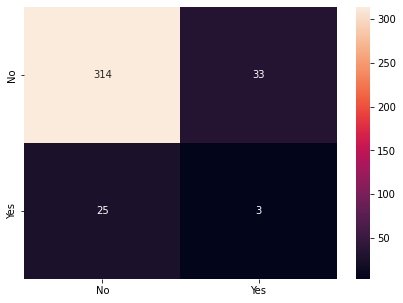

In [18]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

ypredict = dTgini.predict(Xtest)

cm = confusion_matrix(ytest, ypredict, labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ['No', 'Yes']],
                    columns = [i for i in ['No', 'Yes']]
                    )

plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot = True, fmt = 'g')

In [19]:
print(classification_report(ytest, ypredict))

# As we see from our classification report, our predictions are accurate but our data is not very well balanced.


              precision    recall  f1-score   support

           0       0.93      0.90      0.92       347
           1       0.08      0.11      0.09        28

    accuracy                           0.85       375
   macro avg       0.50      0.51      0.50       375
weighted avg       0.86      0.85      0.85       375



Before Counter({0: 1373, 1: 127})
After Counter({0: 1373, 1: 1373})


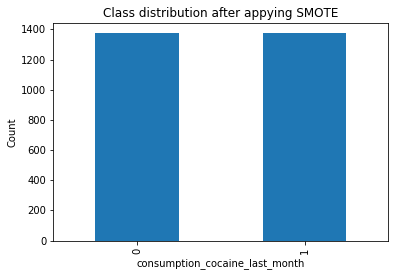

In [20]:
# Imbalanced data is a problem in machine learning.
# We will use SMOTE to balance our data.

import collections

counter = collections.Counter(y)
print('Before',counter)

oversample = imblearn.over_sampling.SMOTE(random_state=1)
X, y = oversample.fit_sample(X, y)

counter = collections.Counter(y)
print('After',counter)


pd.Series(y).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='consumption_cocaine_last_month', ylabel='Count')
plt.show()

In [21]:
# As you see from our class distribution, our data is now balanced.
# Now we will use our resampled data to train our model.

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.25, random_state=1)


In [22]:
print('Decision Tree with Gini Index:')
dTgini.fit(Xtrain, ytrain)
print('Accuracy of DT with Gini Index: {:.4f}'.format(dTgini.score(Xtest, ytest)))
print('\n')

# predicted values
ypredict = dTgini.predict(Xtest)

print('balanced accuracy score: {:.4f}'.format(balanced_accuracy_score(ytest, ypredict)))
print('\n')



Decision Tree with Gini Index:
Accuracy of DT with Gini Index: 0.8923


balanced accuracy score: 0.8922




In [23]:
# Let's use validation set to predict Y axis since we do no have Y axis in validation set

validation_y = dTgini.predict(validation)
score = dTgini.score(validation,validation_y)

# So let's merge the labels with validation data as a new column and try to analyze it.
validation['consumption_cocaine_last_month'] = validation_y

validation_x = validation.drop('consumption_cocaine_last_month', axis=1)
validation_y = validation.pop('consumption_cocaine_last_month')

validation.head()


,age,gender,education,country,ethnicity,personality_neuroticism,personality_extraversion,personality_openness,personality_agreeableness,personality_conscientiousness,personality_impulsiveness,personality_sensation,consumption_alcohol,consumption_amphetamines,consumption_caffeine,consumption_cannabis,consumption_chocolate,consumption_mushrooms,consumption_nicotine
0,3,1,5,6,2,-0.168255,0.244132,0.081794,-0.055461,-0.124354,0.16154,0.20901,4,6,1,4,1,0,4
1,1,1,8,6,2,0.141960,-0.021868,0.220953,-0.081165,0.145953,0.09654,0.20901,4,0,4,0,1,0,0
2,0,0,8,6,2,0.063776,0.028132,-0.191129,0.102434,0.112664,0.09654,-0.11399,3,0,1,4,4,5,3
3,1,0,5,6,2,0.261758,0.003132,-0.074624,-0.136244,-0.100386,0.16154,-0.03599,1,0,1,2,1,0,2
4,0,1,7,0,2,0.141960,-0.085868,-0.360493,-0.136244,-0.368029,-0.04046,-0.11399,4,0,3,3,1,5,3


In [24]:
# We can not print a new score based on validation dataset because labels are created based on DecisionTree predict method, 
# if we try to predict another score with validation_x and validation_y the result will be 100 percent.
# So we will take that values as result of our model and not going to use for testing quality of the model. 
# We can assume like validation set is a real life data input coming from a pipeline 
# and there is no point to make further analysis based on it because there is not a "REAL" labels column.

In [25]:
print('Decision Tree with Entropy:')
dTentropy.fit(Xtrain, ytrain)
print('Accuracy of DT with Entropy: {:.4f}'.format(dTentropy.score(Xtest, ytest)))
print('\n')

# predicted values
ypredict = dTentropy.predict(Xtest)

print('balanced accuracy score: {:.4f}'.format(balanced_accuracy_score(ytest, ypredict)))
print('\n')

Decision Tree with Entropy:
Accuracy of DT with Entropy: 0.8879


balanced accuracy score: 0.8877




<AxesSubplot:>

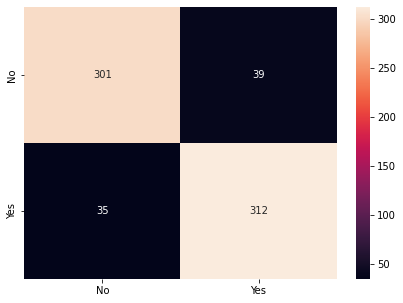

In [26]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

ypredict = dTgini.predict(Xtest)

cm = confusion_matrix(ytest, ypredict, labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ['No', 'Yes']],
                    columns = [i for i in ['No', 'Yes']]
                    )

plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot = True, fmt = 'g')

In [27]:
print(classification_report(ytest, ypredict))


              precision    recall  f1-score   support

           0       0.90      0.89      0.89       340
           1       0.89      0.90      0.89       347

    accuracy                           0.89       687
   macro avg       0.89      0.89      0.89       687
weighted avg       0.89      0.89      0.89       687



In [28]:
# After balancing the data classification report shows our "real" accuracy is around .89.


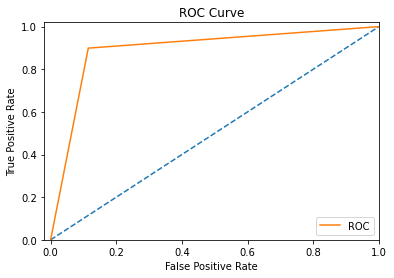

In [29]:
#ROC curve Decison Tree

dTprob = dTgini.predict_proba(Xtest)[:,1]

fpr, tpr, threshold = roc_curve(ytest, dTprob)

plt.plot([0,1],[0,1], linestyle='--')

plt.plot(fpr, tpr, label='ROC')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [30]:
#The more that the ROC curve hugs the top left corner of the plot, the better the model does at classifying the data into categories.
#Our model has high AUC, which indicates that it has the very wide area under the curve and is the nice model at correctly classifying observations into categories.
decisionTree_score = roc_auc_score(ytest, dTprob)
print('AUC:',roc_auc_score(ytest, dTprob))

AUC: 0.8922147821664689


In [31]:
# KNN model with K=5 and K=10

from sklearn.neighbors import KNeighborsClassifier

knn5 = KNeighborsClassifier(n_neighbors=5)
knn10 = KNeighborsClassifier(n_neighbors=10)

knn5.fit(Xtrain, ytrain)
knn10.fit(Xtrain, ytrain)

print('KNN with K=5:')
print('Accuracy of KNN with K=5: {:.4f}'.format(knn5.score(Xtest, ytest)))
print('\n')

print('KNN with K=10:')
print('Accuracy of KNN with K=10: {:.4f}'.format(knn10.score(Xtest, ytest)))
print('\n')

# predicted values
ypredict = knn5.predict(Xtest)

print('balanced accuracy score: {:.4f}'.format(balanced_accuracy_score(ytest, ypredict)))
print('\n')






KNN with K=5:
Accuracy of KNN with K=5: 0.8734


KNN with K=10:
Accuracy of KNN with K=10: 0.8574


balanced accuracy score: 0.8721




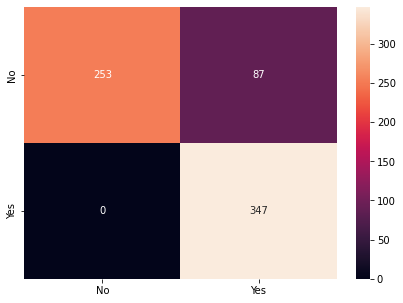

In [32]:
#Confusion Matrix
cm = confusion_matrix(ytest, ypredict, labels = [0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ['No', 'Yes']],
                    columns = [i for i in ['No', 'Yes']])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot = True, fmt='g');

In [33]:
print('Classification Report:\n', classification_report(ytest, ypredict))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.74      0.85       340
           1       0.80      1.00      0.89       347

    accuracy                           0.87       687
   macro avg       0.90      0.87      0.87       687
weighted avg       0.90      0.87      0.87       687



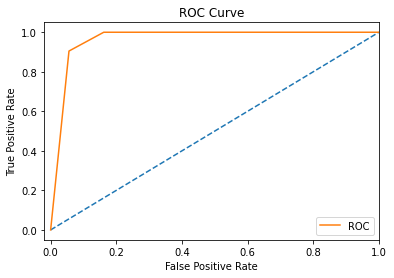

In [34]:
prob = knn5.predict_proba(Xtest)[:,1]

fpr, tpr, threshold = roc_curve(ytest, prob)

plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr, tpr, label='ROC')
_=plt.xlabel('False Positive Rate')
_=plt.ylabel('True Positive Rate')
_=plt.title('ROC Curve')
_=plt.xlim([-0.02,1])
_=plt.legend(loc='lower right')

In [35]:
knn5_score = roc_auc_score(ytest, prob)
print('AUC:',roc_auc_score(ytest, prob))

AUC: 0.9643668418375996


In [36]:
# After 0.93 percent of accuracy I would love to perform a cross validation check to test overfitting

scores = cross_val_score(knn5, Xtest, ytest, cv=10, scoring='accuracy')
print('Cross Validation Accuracy of KNN: {:.4f}'.format(scores.mean()))

# Cross validation score shows us a more realistic accuracy rate

Cross Validation Accuracy of DT with Gini Index: 0.7786


In [37]:
#adabossting
adaBoost = AdaBoostClassifier(
                             #base_estimator=dTgini1,
                             n_estimators=50,
                             random_state=2)
adaBoost = adaBoost.fit(Xtrain, ytrain)

ypredict= adaBoost.predict(Xtest)
print('Train Score:',adaBoost.score(Xtrain, ytrain))
print('Test Score:',adaBoost.score(Xtest, ytest))

Train Score: 0.893152015541525
Test Score: 0.8675400291120815


Confusion Matrix:


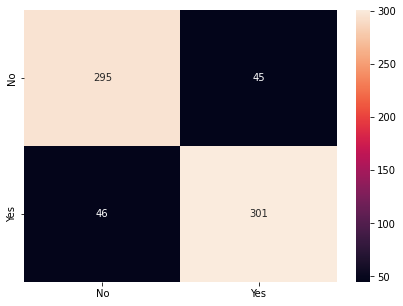

In [38]:
print('Confusion Matrix:')

cm = confusion_matrix(ytest, ypredict, labels = [0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ['No','Yes']],
                    columns = [i for i in ['No', 'Yes']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True, fmt='g');

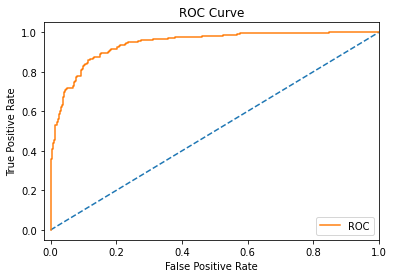

In [39]:
prob = adaBoost.predict_log_proba(Xtest)[:,1]

fpr, tpr, threshold = roc_curve(ytest, prob)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr, tpr, label='ROC')
_=plt.xlabel('False Positive Rate')
_=plt.ylabel('True Positive Rate')
_=plt.title('ROC Curve')
_=plt.xlim([-0.02,1])
_=plt.legend(loc='lower right')

In [40]:
adaBoost_score = roc_auc_score(ytest, prob)
print('AUC:', roc_auc_score(ytest, prob))

AUC: 0.9416511273097135


In [41]:
# Again, I feel like we need a cross-validation check.

scores = cross_val_score(adaBoost, Xtest, ytest, cv=10, scoring='accuracy')
print('Cross Validation Accuracy of adaBoost: {:.4f}'.format(scores.mean()))

# This time, Cross validation accuracy is same as test accuracy

Cross Validation Accuracy of DT with Gini Index: 0.8618


In [42]:
#GradientBoost
gradientBoostingC = GradientBoostingClassifier(learning_rate = 0.1,
                                               n_estimators = 25,
                                               random_state = 3)
gradientBoostingC = gradientBoostingC.fit(Xtrain, ytrain)

ypredict = gradientBoostingC.predict(Xtest)
print('Train Score:', gradientBoostingC.score(Xtrain, ytrain))
print('Test Score:', gradientBoostingC.score(Xtest, ytest))

Train Score: 0.8936376881981545
Test Score: 0.8675400291120815


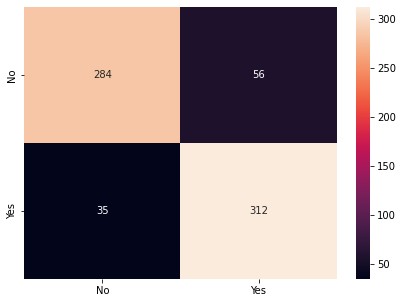

In [43]:
cm = confusion_matrix(ytest, ypredict, labels=[0,1])
df_cm = pd.DataFrame(cm, index = [i for i in ['No','Yes']],
                    columns = [i for i in ['No','Yes']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot = True, fmt = 'g');

In [44]:
print(classification_report(ytest, ypredict))


              precision    recall  f1-score   support

           0       0.89      0.84      0.86       340
           1       0.85      0.90      0.87       347

    accuracy                           0.87       687
   macro avg       0.87      0.87      0.87       687
weighted avg       0.87      0.87      0.87       687



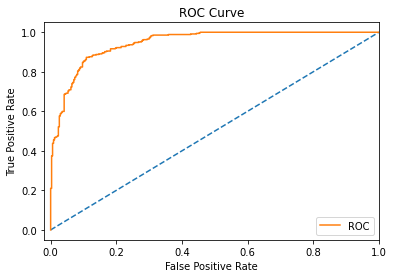

In [45]:
prob = gradientBoostingC.predict_proba(Xtest)[:,1]

fpr, tpr, threshold = roc_curve(ytest,prob)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr, tpr, label='ROC')
_=plt.xlabel('False Positive Rate')
_=plt.ylabel('True Positive Rate')
_=plt.title('ROC Curve')
_=plt.xlim([-0.02,1])
_=plt.legend(loc='lower right')

In [46]:
gradientBoost_score = roc_auc_score(ytest, prob)
print('AUC:', roc_auc_score(ytest, prob))

AUC: 0.9459569418545517


In [47]:
#Ensemble Random Forest Classifier

RFC = RandomForestClassifier(n_estimators=50, 
                             random_state=4, 
                             max_features='log2',
                             max_depth=5)
RFC = RFC.fit(Xtrain, ytrain)

ypredict = RFC.predict(Xtest)

print('Train score:', RFC.score(Xtrain, ytrain))
print('Test Score:', RFC.score(Xtest, ytest))

Train score: 0.8902379796017484
Test Score: 0.858806404657933


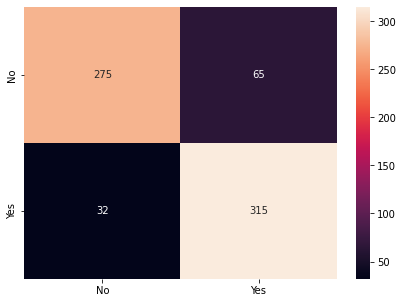

In [48]:
cm = confusion_matrix(ytest, ypredict, labels=[0,1])
df_cm = pd.DataFrame(cm, index=[i for i in ['No','Yes']],
                    columns = [i for i in ['No', 'Yes']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot = True, fmt = 'g');

In [49]:
print(classification_report(ytest, ypredict))


              precision    recall  f1-score   support

           0       0.90      0.81      0.85       340
           1       0.83      0.91      0.87       347

    accuracy                           0.86       687
   macro avg       0.86      0.86      0.86       687
weighted avg       0.86      0.86      0.86       687



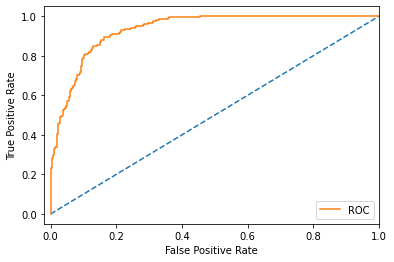

In [50]:
prob = RFC.predict_proba(Xtest)[:,1]

fpr, tpr, threshold = roc_curve(ytest, prob)

plt.plot([0,1],[0,1], linestyle ='--')

plt.plot(fpr, tpr, label='ROC')
_=plt.xlabel('False Positive Rate')
_=plt.ylabel('True Positive Rate')
_=plt.xlim([-0.02,1])
_=plt.legend(loc='lower right')

In [51]:
rfc_score = roc_auc_score(ytest, prob)
print('AUC:', roc_auc_score(ytest, prob))

AUC: 0.9331496863875234


In [52]:
# SVM Classifier with RBF Kernel and GridSearchCV to find best parameters

param_grid = {'C': [0.1, 1, 10, 100, 1000],
			  'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
			  'kernel': ['rbf']}
grid = GridSearchCV(SVC(probability=True), param_grid, refit=True, verbose=3)
grid.fit(Xtrain, ytrain)

#print(grid.best_params_)
#print(grid.best_estimator_)
grid_predictions = grid.predict(Xtest)



Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.505 total time=   0.8s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.507 total time=   0.7s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.507 total time=   0.7s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.507 total time=   0.7s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.509 total time=   0.7s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.869 total time=   0.6s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.862 total time=   0.6s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.828 total time=   0.6s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.857 total time=   0.6s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.827 total time=   0.6s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.847 total time=   0.5s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

Train Score: 0.9975716367168529
Test Score: 0.9810771470160117


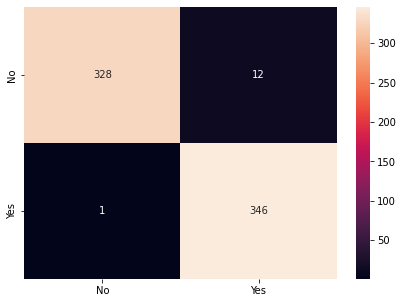

In [53]:
print('Train Score:', grid.score(Xtrain, ytrain))
print('Test Score:', grid.score(Xtest, ytest))

cm = confusion_matrix(ytest, grid_predictions, labels=[0,1])
df_cm = pd.DataFrame(cm, index=[i for i in ['No','Yes']],
					columns = [i for i in ['No', 'Yes']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot = True, fmt = 'g');

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       340
           1       0.97      1.00      0.98       347

    accuracy                           0.98       687
   macro avg       0.98      0.98      0.98       687
weighted avg       0.98      0.98      0.98       687

AUC: 0.9958806577385997


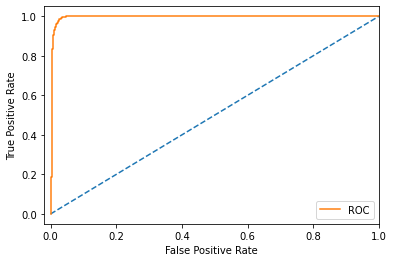

In [54]:
print(classification_report(ytest, grid_predictions))

prob = grid.predict_proba(Xtest)[:,1]

fpr, tpr, threshold = roc_curve(ytest, prob)

plt.plot([0,1],[0,1], linestyle ='--')

plt.plot(fpr, tpr, label='ROC')

_=plt.xlabel('False Positive Rate')

_=plt.ylabel('True Positive Rate')

_=plt.xlim([-0.02,1])

_=plt.legend(loc='lower right')

svm_score = roc_auc_score(ytest, prob)

print('AUC:', roc_auc_score(ytest, prob))

In [ ]:
# Conclusion

# The data is originally contains categorical and numerical data. I have converted categorical data into numerical data using LabelEncoder. 
# The data is imbalanced. I have used SMOTE to balance the data.
# I used normalization on numerical data and standardization on categorical data.

# These preprocessing steps are very important to get good results. 
# Otherwise, the model will not be able to predict the outcome correctly.
# After preparing the data, the rest is just applying different models and comparing the results.
# The models are imported from sklearn library.


# ROC curve is used to evaluate the performance of the model. AUC is used to compare the performance of different models.
# When I suspected overfitting I used cross validation to check the accuracy of the model.
# Confusion matrix and classification report are used to get better insights about the model.
# The metric used to evaluate the performance of the models are balanced accuracy.



# I have used 6 different models to predict the outcome.
# The application of some models are very similar. However, SVM is a little bit different.
# To be able to use SVM, I had to find the best parameters using GridSearchCV.
# The best parameters are C=1000, gamma=0.0001, and kernel='rbf'.
# However SVM overfitted our data and the accuracy was unrealistic. 

# We can see that the best model is KNN with 0.85 score, the rest of the models are a bit underperformed or overfit the data.
# I picked KNN to predict the outcome of the test data in best_model.ipynb file.
# The best model is saved in knn10.sav file and the predictions saved in predictions.csv file.

# In the test dataset we do not have a Y axis which is label of the data.
# So we can not evaluate the performance of the model. However, based on the train,test performance of our KNN model we can assume we have 85% accuracy.


